In [35]:
import numpy
from matplotlib import pyplot
import matplotlib.animation as animation
%matplotlib notebook

In [161]:
r = 1.0

<IPython.core.display.Javascript object>


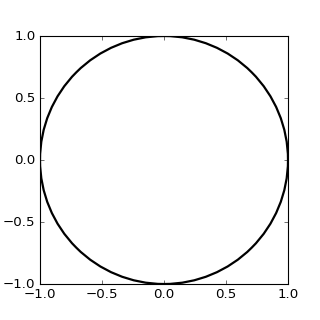

In [162]:
fig = pyplot.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
circle = pyplot.Circle((0, 0), r, color="black", fill=False, lw=2, zorder=10)
ax.add_artist(circle)
ax.set_xlim(-r, r)
ax.set_ylim(-r, r)
ax.set_aspect("equal")
pyplot.show()

In [113]:
N = 4000

<IPython.core.display.Javascript object>


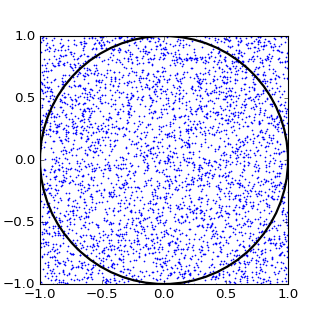

In [166]:
fig = pyplot.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
circle = pyplot.Circle((0, 0), r, color="black", fill=False, lw=2, zorder=10)
ax.add_artist(circle)
ax.set_xlim(-r, r)
ax.set_ylim(-r, r)
ax.set_aspect("equal")

xdata = list()
ydata = list()

line, = ax.plot(xdata, ydata, ".", ms=2)

def update(i):
    x, y = numpy.random.uniform(-r, r, size=2)
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,


# ani = animation.FuncAnimation(fig, update, numpy.arange(1, N), interval=10, repeat=False)

for _ in range(N):
    update(_)

pyplot.show()

In [168]:
data = numpy.array([xdata, ydata])
norms = numpy.linalg.norm(data, axis=0)
in_circle = norms < r

colors = numpy.full(norms.shape, "crimson")
colors[in_circle] = "green"

<IPython.core.display.Javascript object>


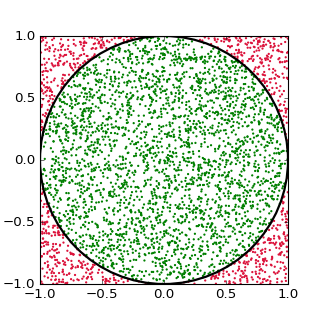

In [169]:
fig = pyplot.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
circle = pyplot.Circle((0, 0), r, color="black", fill=False, lw=2, zorder=10)
ax.add_artist(circle)
ax.set_xlim(-r, r)
ax.set_ylim(-r, r)
ax.set_aspect("equal")

ax.scatter(xdata, ydata, color=colors, s=1)
pyplot.show()

In [170]:
Nhits = numpy.count_nonzero(in_circle)
pi = 4 * Nhits / N

print(pi)

3.092


In [171]:
trials = 5000

pi_arr = list()
for i in range(trials):
    xdata, ydata = numpy.random.uniform(-r, r, size=(2, N))

    data = numpy.array([xdata, ydata])
    norms = numpy.linalg.norm(data, axis=0)
    in_circle = norms < r

    Nhits = numpy.count_nonzero(in_circle)
    pi = 4 * Nhits / N
    
    pi_arr.append(pi)
    # print(i+1, Nhits, pi)

In [172]:
pi_mean = numpy.mean(pi_arr)
pi_std = numpy.std(pi_arr)

<IPython.core.display.Javascript object>


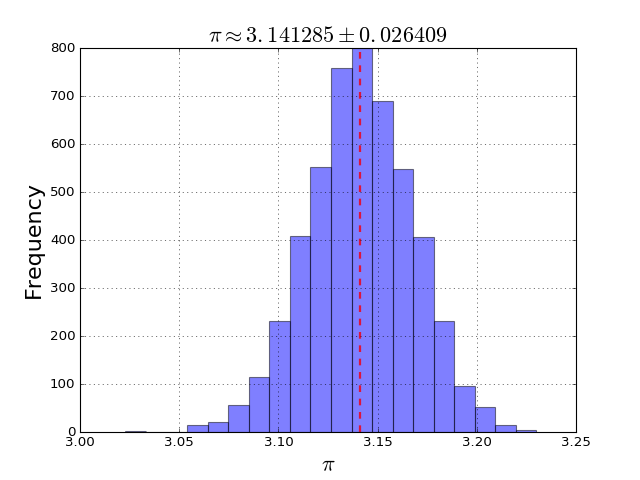

In [173]:
pyplot.figure()
pyplot.hist(pi_arr, bins=20, alpha=0.5)

pyplot.title(r"$\pi \approx %f \pm %f$" % (pi_mean, pi_std), fontsize=20)

pyplot.axvline(pi_mean, ls="--", color="crimson", lw=2)

pyplot.grid()
pyplot.xlabel(r"$\pi$", fontsize=20)
pyplot.ylabel(r"Frequency", fontsize=20)
pyplot.show()